## Train set X & Y

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv("train_x.csv", header = None)
Y = pd.read_csv("train_y.csv", header = None)

In [2]:
X_COPY = X
Y_COPY = Y

In [3]:
import matplotlib.pyplot as plt
import cv2

MATRIX_SIZE = (10,10)
NUM_EXAMPLES = 99
OFFSET = 2300
plt.figure(figsize=(20,20))

def plot_img(img, title, size, pos):
    plt.subplot(size[0], size[1], pos), plt.imshow(img, cmap="gray")
    plt.title(title), plt.xticks([]), plt.yticks([])

def toImg(x_series):
    img = x_series.values.reshape(64,64)
    
    y = Y_COPY.iloc[int(x_series.name)][0]
    position = int(x_series.name)+1 - OFFSET
    plot_img(img, "ANS:"+str(y)+":POS="+str(position-1), MATRIX_SIZE, position) #positioning has no 3

def imgContour(x_series):
    img_og = x_series.values.reshape(64,64)
    img_og = img_og.astype(np.uint8)
    img = img_og.copy()
    
    THRESH_1 = 205
    THRESH_2 = 254

    _, img = cv2.threshold(img, THRESH_1, 255, cv2.THRESH_BINARY)
    
    if len(img[img > 200]) > 730: #CASE: bright background
        _, img = cv2.threshold(img_og.copy(), THRESH_2, 255, cv2.THRESH_BINARY)
        
    _, contours, _ = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    n_contours = len(contours)

    if n_contours > 10 : #got the rice pattern
#         img = cv2.dilate(img,np.ones((2,2),np.uint8),iterations=1)
        img = cv2.medianBlur(img,3)
        _, contours, _ = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        n_contours = len(contours)

    for cnt in contours:
        perimeter = cv2.arcLength(cnt,True)
        area = cv2.contourArea(cnt)
        if perimeter > 15 and area > 19:

            # straight bounding rectable
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(img, (x,y), (x+w,y+h), 120,1)
            
    y = Y_COPY.iloc[int(x_series.name)][0]
    position = int(x_series.name)+1 - OFFSET
    plot_img(img, "ANS:"+str(y)+":POS="+str(position-1), MATRIX_SIZE, position) #positioning has no 3

X = X_COPY.truncate(before=OFFSET,after=OFFSET+NUM_EXAMPLES)
Y = Y_COPY.truncate(before=OFFSET,after=OFFSET+NUM_EXAMPLES)

Examples 2300 2399


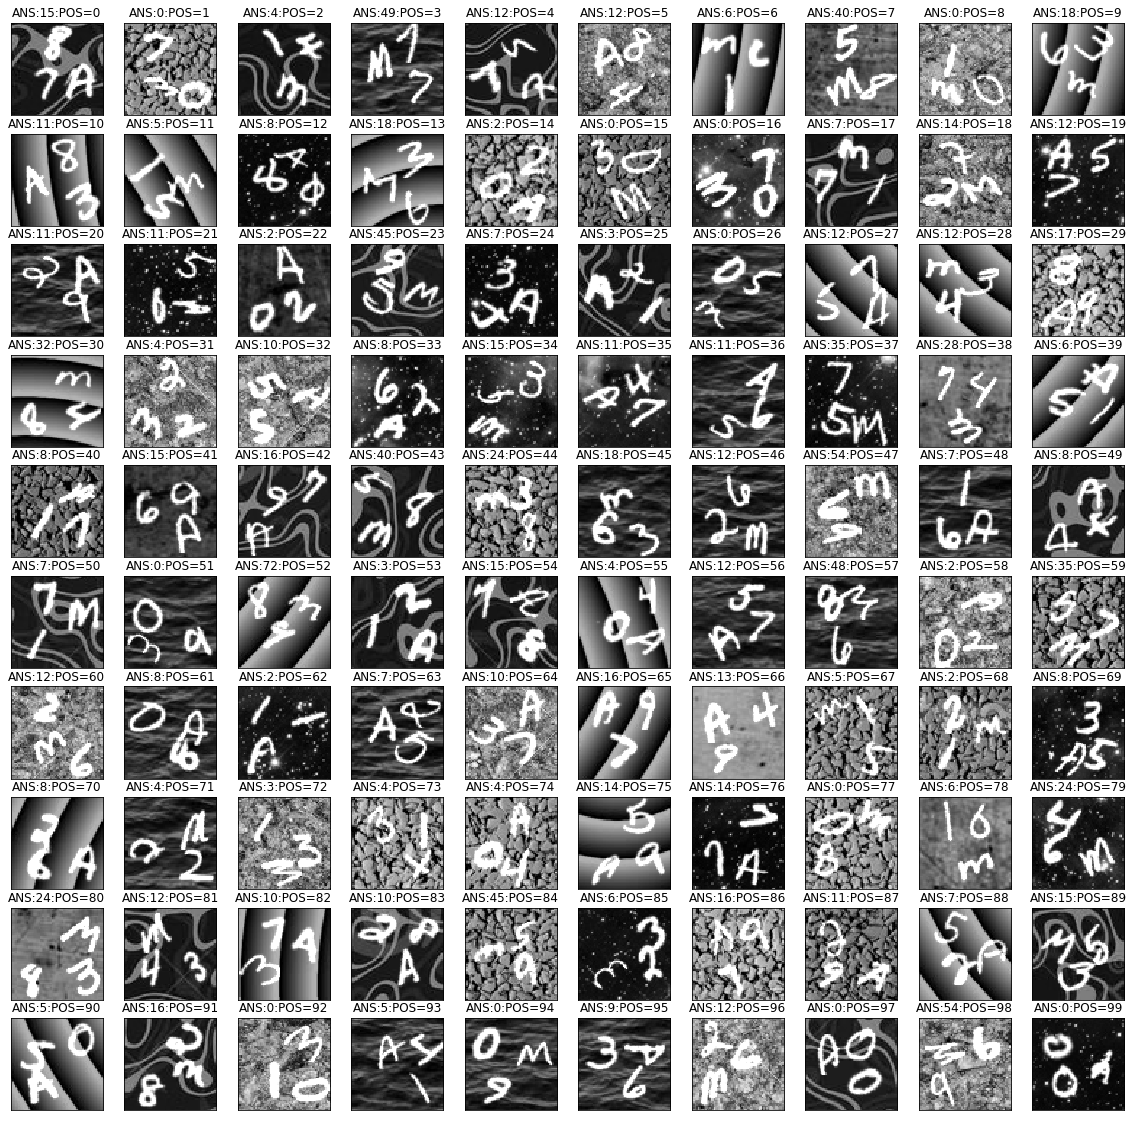

In [4]:
print ("Examples", OFFSET, OFFSET+NUM_EXAMPLES)
X.apply(toImg, axis=1)

plt.show()

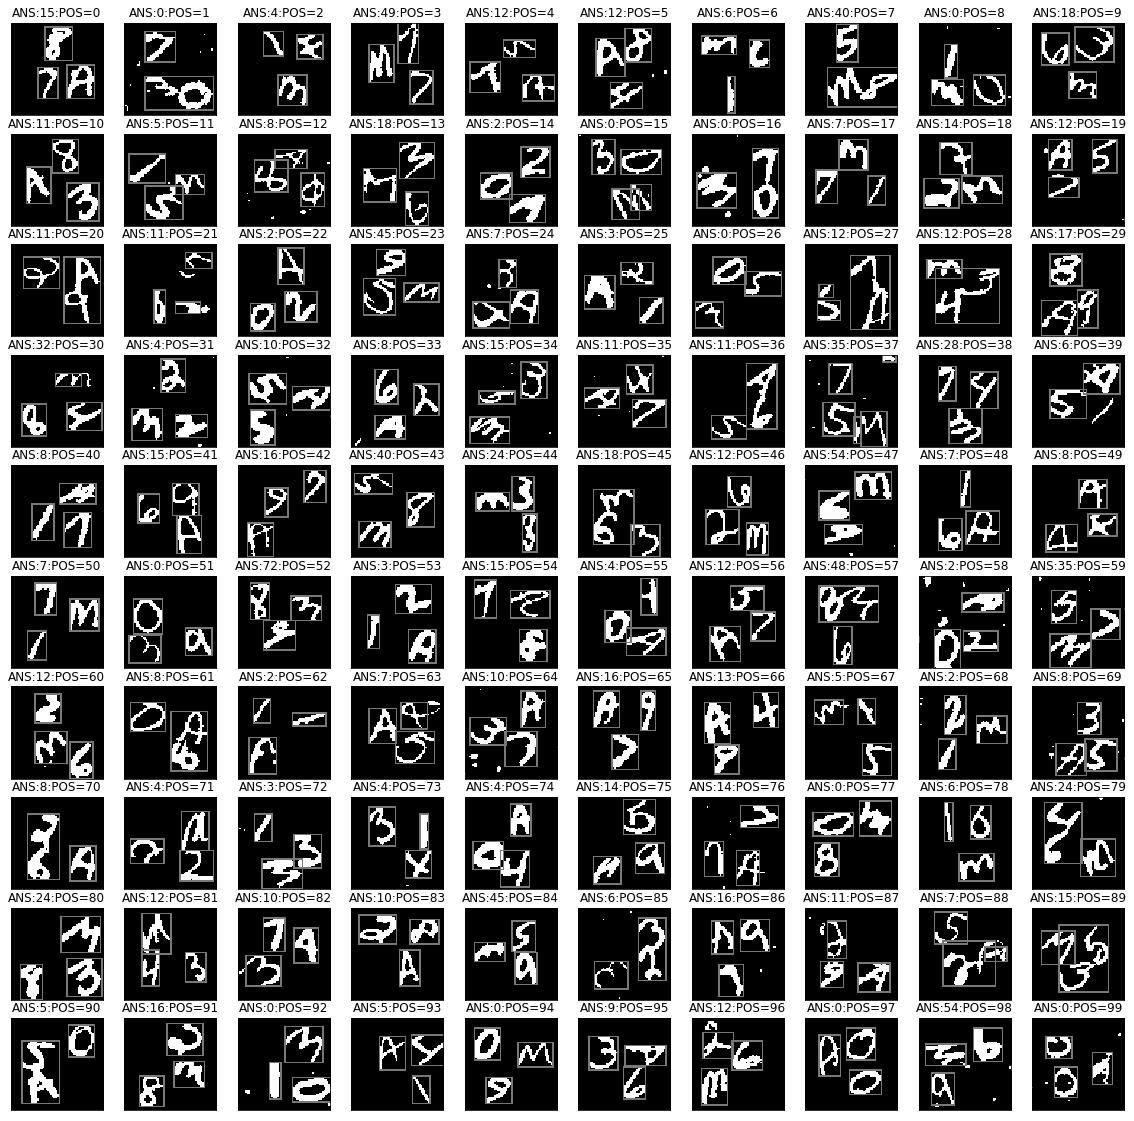

In [347]:
plt.figure(figsize=(20,20))
X.apply(imgContour, axis=1)
plt.show()

## Contours

641
Num contours found :  41
Num contours found (after median blur) :  7
Area 3.0
Perimeter 6.828427076339722
Area 0.5
Perimeter 3.414213538169861
Area 139.0
Perimeter 69.11269772052765
Perimeter 69.11269772052765
Area 2.0
Perimeter 6.828427076339722
Area 4.5
Perimeter 15.071067571640015
Area 128.5
Perimeter 106.66904652118683
Perimeter 106.66904652118683
Area 226.5
Perimeter 73.69848418235779
Perimeter 73.69848418235779
PERFECT


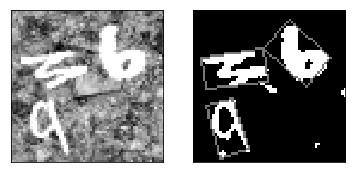

In [9]:
import cv2

choice = 98

img_og = X.iloc[choice].values.reshape(64,64)
img_og = img_og.astype(np.uint8)
img = img_og.copy()
img_disp = img_og.copy()
THRESH_1 = 205
THRESH_2 = 254

_, img = cv2.threshold(img, THRESH_1, 255, cv2.THRESH_BINARY)
# img = cv2.medianBlur(img,3)

print(len(img[img > 200]))
if len(img[img > 200]) > 730: #CASE: bright background
    _, img = cv2.threshold(img_og.copy(), THRESH_2, 255, cv2.THRESH_BINARY)
    
# img = cv2.dilate(img,np.ones((3,3),np.uint8),iterations=1)
im2, contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img, contours, which, 120, 1) #for cv2.RETR_TREE

n_contours = len(contours)
print("Num contours found : ",n_contours)

if n_contours > 10 : #got the rice pattern
#     img = cv2.dilate(img,np.ones((2,2),np.uint8),iterations=1)
    img = cv2.medianBlur(img,3)
    _, contours, _ = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    n_contours = len(contours)
    print("Num contours found (after median blur) : ",n_contours)

char_count = 0
    
for cnt in contours:
    perimeter = cv2.arcLength(cnt,True)
    area = cv2.contourArea(cnt)
    print("Area",area)
    print("Perimeter",perimeter)
    if perimeter > 15 and area > 19:
        char_count += 1
        print("Perimeter",perimeter)

        # straight bounding rectable
#         x,y,w,h = cv2.boundingRect(cnt)
#         cv2.rectangle(img, (x,y), (x+w,y+h), 120,1)
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img,[box],0,120,1)
        
if char_count > 3:
    print("bad")
elif char_count == 2:
    print("cut mid")
elif char_count < 2:
    print("bad")
else:
    print("PERFECT")

plot_img(img, "", (1,2),2)
plot_img(img_disp, "", (1,2),1)
plt.show()

## Harris Corners

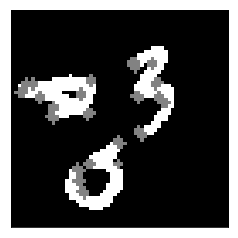

In [223]:
import cv2

#get first image
choice = 0

img = X.iloc[choice].values.reshape(64,64)
img = img.astype(np.uint8)
THRESH = 215

ret, img = cv2.threshold(img, THRESH, 255, cv2.THRESH_BINARY)
corners = cv2.cornerHarris(img, 2, 3, 0.04)
cv2.normalize(corners, corners, 0, 1, cv2.NORM_MINMAX)

# threshold for an optimal value
thres = 0.45
# list all points higher than threshold
loc = np.where(corners >= thres)
# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
#     print(pt) #x,y
    cv2.circle(img, pt, 1, (130,0,0), -1)

    
plot_img(img, "", (1,1),1)
plt.show()

## Edge Detection

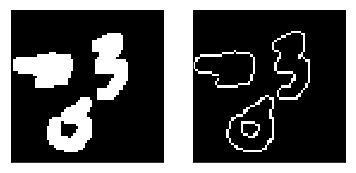

In [225]:
import cv2

choice = 0

img = X.iloc[choice].values.reshape(64,64)
img = img.astype(np.uint8)
THRESH_1 = 215

_, img = cv2.threshold(img, THRESH_1, 255, cv2.THRESH_BINARY)
img = cv2.GaussianBlur(img, (3,3), 0)
THRESH_2 = 0
_, img = cv2.threshold(img, THRESH_2, 255, cv2.THRESH_BINARY)

I_edge = cv2.Canny(img, 10, 50)

plot_img(img, "", (1,2),1)
plot_img(I_edge, "", (1,2),2)
plt.show()

# Texture segmentation : K MEANS

(64, 64)
(4096, 3)
[[2 2 2 ..., 0 0 0]
 [2 2 2 ..., 0 0 0]
 [2 2 2 ..., 0 0 0]
 ..., 
 [3 3 3 ..., 0 0 0]
 [3 3 3 ..., 0 0 0]
 [3 3 3 ..., 0 0 0]]


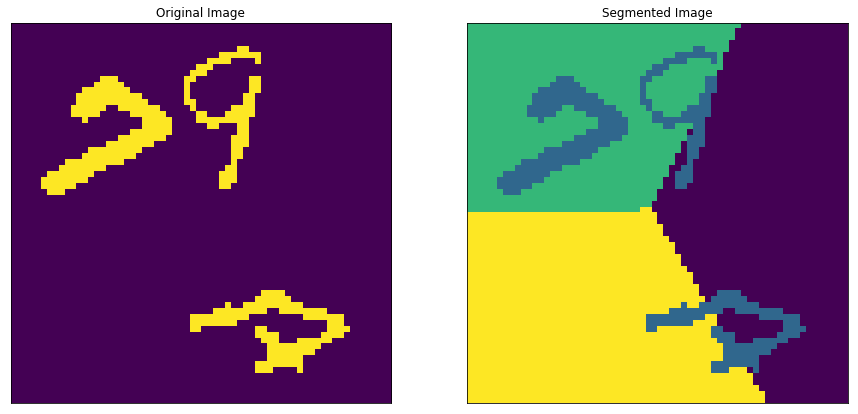

In [68]:
import cv2

def perform_kmeans(img_data, K):
    """
    Run KMenas algorithm on img_data
    :param img_data: image data represented as
                [instance, features]
    :param K: number of clusters
    :return img_labels: clustered image
    """
    # define criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
    # set flags
    flags = cv2.KMEANS_RANDOM_CENTERS
    # convert data to float32
    img_data = np.float32(img_data)
    # apply kmeans
    _, labels, _ = cv2.kmeans(img_data, K, None, criteria, 10, flags)
    # reshape into image
    img_labels = labels.reshape((img.shape[0], img.shape[1]))
    return img_labels

def display_kmeans(img_data):
    """
    Display the original and segmented image
    :param img_data: image data represented as
                [instance, features]
    :return: nothing
    """
    # number of clusters
    K = 4
    # run kmeans
    img_labels = perform_kmeans(img_data, K)
    print(img_labels)
    # display images
    plt.figure(figsize=(15,15))
    plt.subplot(121), plt.imshow(img)
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_labels)
    plt.title("Segmented Image"), plt.xticks([]), plt.yticks([])
    plt.show()

def add_spatial(img, img_data):
    """
    Add spatial information to clustering
    :param img: original input image
    :param img_data: image data represented as
                [instance, features]
    :return img_data: new image data matrix
    """
    # spatial information
    rs = np.arange(img.shape[0])
    cs = np.arange(img.shape[1])
    cs, rs = np.meshgrid(cs, rs)
    rs = rs.reshape((img.shape[0] * img.shape[1], 1))
    cs = cs.reshape((img.shape[0] * img.shape[1], 1))
    # add spatial information
    img_data = np.hstack((img_data, rs))
    img_data = np.hstack((img_data, cs))
    return img_data


choice = 10

img = X.iloc[choice].values.reshape(64,64)
img = img.astype(np.uint8)
# img = cv2.resize(img, None, fx=0.5, fy=0.5)
print(img.shape)
THRESH_1 = 215
_, img = cv2.threshold(img, THRESH_1, 255, cv2.THRESH_BINARY)
img_data = img.reshape((img.shape[0] * img.shape[1], 1))
img_data = add_spatial(img,img_data)
print(img_data.shape)
display_kmeans(img_data)

## Test set X

In [116]:
test_X = pd.read_csv("test_x.csv", header = None)

In [118]:
test_X_COPY = test_X

Examples 4900 4999


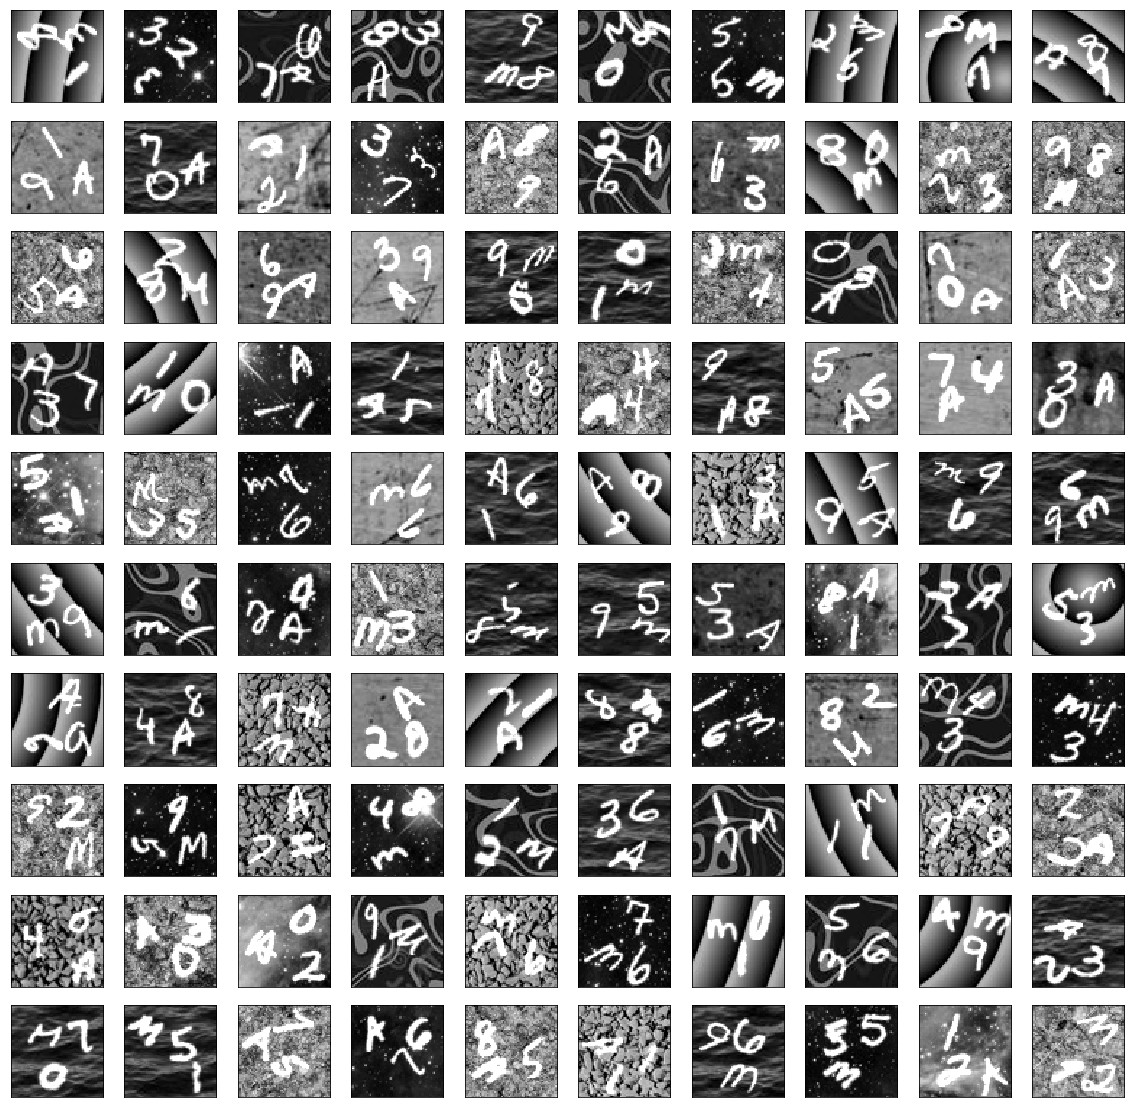

In [122]:
import matplotlib.pyplot as plt

MATRIX_SIZE = (10,10)
NUM_EXAMPLES = 99
OFFSET = 4900
plt.figure(figsize=(20,20))

def plot_img(img, title, size, pos):
    plt.subplot(size[0], size[1], pos), plt.imshow(img, cmap="gray")
    plt.title(title), plt.xticks([]), plt.yticks([])

def toImg(x):
    img = x.values.reshape(64,64)
    
    position = int(x.name)+1 - OFFSET
    plot_img(img, "", MATRIX_SIZE, position) #positioning has no 3


X = test_X_COPY.truncate(before=OFFSET,after=OFFSET+NUM_EXAMPLES)
print "Examples", OFFSET, OFFSET+NUM_EXAMPLES 
X.apply(toImg, axis=1)


plt.show()